In [283]:
#Load Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import matplotlib.dates as mdates
import investpy
import statistics

In [284]:
#Import data for selected companies 
start = '01/01/2010'
end = '31/12/2019'

stock_JKH = investpy.get_stock_historical_data(stock='JKH', country='Sri Lanka', from_date = start, to_date = end)
stock_CTC = investpy.get_stock_historical_data(stock='CTC', country='Sri Lanka', from_date = start, to_date = end) 
stock_HNB = investpy.get_stock_historical_data(stock='HNB', country='Sri Lanka', from_date = start, to_date = end)
stock_DIAL = investpy.get_stock_historical_data(stock='DIAL', country='Sri Lanka', from_date = start, to_date = end)
stock_COMB = investpy.get_stock_historical_data(stock='COMB', country='Sri Lanka', from_date = start, to_date = end)
stock_SPEN = investpy.get_stock_historical_data(stock='SPEN', country='Sri Lanka', from_date = start, to_date = end)
stock_NEST = investpy.get_stock_historical_data(stock='NEST', country='Sri Lanka', from_date = start, to_date = end) 
stock_SLTL = investpy.get_stock_historical_data(stock='SLTL', country='Sri Lanka', from_date = start, to_date = end)
stock_WATA = investpy.get_stock_historical_data(stock='WATA', country='Sri Lanka', from_date = start, to_date = end)
stock_DOCK = investpy.get_stock_historical_data(stock='DOCK', country='Sri Lanka', from_date = start, to_date = end)
stock_EXPO = investpy.get_stock_historical_data(stock='EXPO', country='Sri Lanka', from_date = start, to_date = end)
stock_HHL = investpy.get_stock_historical_data(stock='HHL', country='Sri Lanka', from_date = start, to_date = end)
stock_TKYO = investpy.get_stock_historical_data(stock='TKYO', country='Sri Lanka', from_date = start, to_date = end)
stock_LION = investpy.get_stock_historical_data(stock='LION', country='Sri Lanka', from_date = start, to_date = end)
stock_LHCL = investpy.get_stock_historical_data(stock='LHCL', country='Sri Lanka', from_date = start, to_date = end)

In [285]:
all_vals = [stock_JKH['Open'], stock_CTC['Open'], stock_HNB['Open'], stock_DIAL['Open'], stock_COMB['Open'], 
            stock_SPEN['Open'], stock_NEST['Open'], stock_SLTL['Open'], stock_WATA['Open'], stock_DOCK['Open'], 
            stock_EXPO['Open'], stock_HHL['Open'], stock_TKYO['Open'], stock_LION['Open'], stock_LHCL['Open']]

df = pd.concat(all_vals, axis=1)
df.columns = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']
df = df.dropna()

In [286]:
# Closing price
df.head()

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2011-06-14,191.18,370.0,219.99,9.7,120.67,147.0,704.0,55.1,24.0,240.95,14.4,45.8,53.18,225.1,42.0
2011-06-16,189.27,370.0,216.06,9.6,120.16,146.0,705.0,54.5,23.9,242.86,13.3,45.8,52.73,223.0,41.0
2011-06-17,189.39,363.0,216.06,9.4,122.51,145.0,705.0,54.4,24.0,241.52,12.5,45.7,51.36,220.0,41.0
2011-06-20,189.27,365.0,215.08,11.0,117.89,142.5,705.0,61.0,24.0,242.86,12.9,46.1,51.27,224.9,41.0
2011-06-21,189.27,364.0,214.09,9.5,120.20,143.0,704.8,54.0,24.1,242.86,12.5,45.5,52.73,217.6,40.1


In [287]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [288]:
# Calculate percentage change in stock prices using log for represent data as time additive values.  

returns = df.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2011-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-16,-0.010041,0.000000,-0.018026,-0.010363,-0.004235,-0.006826,0.001419,-0.010949,-0.004175,0.007896,-0.079464,0.000000,-0.008498,-0.009373,-0.024098
2011-06-17,0.000634,-0.019100,0.000000,-0.021053,0.019368,-0.006873,0.000000,-0.001837,0.004175,-0.005533,-0.062035,-0.002186,-0.026325,-0.013544,0.000000
2011-06-20,-0.000634,0.005495,-0.004546,0.157186,-0.038441,-0.017392,0.000000,0.114510,0.000000,0.005533,0.031499,0.008715,-0.001754,0.022028,0.000000
2011-06-21,0.000000,-0.002743,-0.004614,-0.146603,0.019405,0.003503,-0.000284,-0.121890,0.004158,0.000000,-0.031499,-0.013101,0.028079,-0.032997,-0.022196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.010375,0.037209,-0.005187,0.007905,0.000000,-0.008547,0.000616,0.022765,-0.045635,0.023610,-0.019803,-0.012579,0.000000,-0.008217,0.002407
2019-12-26,-0.001215,-0.044365,0.022843,-0.015873,-0.010340,0.010672,-0.000616,-0.012945,-0.003899,0.016529,0.000000,0.012579,0.062003,0.006579,0.002401
2019-12-27,0.006061,0.022473,-0.011386,0.000000,0.005183,0.000000,0.000000,-0.003263,0.019343,0.030672,-0.020203,0.006231,0.002002,0.000328,-0.014493


In [289]:
#Calculating Covarient Matrix

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,0.000259,0.000035,0.000059,0.000059,0.000062,0.000047,0.000019,0.000048,0.000072,0.000046,0.000062,0.000056,0.000082,0.000003,0.000119
CTC,0.000035,0.000372,0.000030,0.000004,0.000018,-0.000012,0.000032,0.000021,0.000020,0.000021,0.000021,0.000029,0.000028,0.000009,0.000066
HNB,0.000059,0.000030,0.000347,0.000061,0.000077,0.000051,0.000022,0.000087,0.000039,0.000067,0.000056,0.000094,0.000142,0.000040,0.000115
DIAL,0.000059,0.000004,0.000061,0.000525,0.000058,0.000057,0.000005,0.000198,0.000068,0.000053,0.000065,0.000056,0.000062,0.000048,0.000095
COMB,0.000062,0.000018,0.000077,0.000058,0.000184,0.000048,0.000016,0.000062,0.000058,0.000042,0.000058,0.000082,0.000099,0.000014,0.000072
SPEN,0.000047,-0.000012,0.000051,0.000057,0.000048,0.000293,0.000004,0.000078,0.000077,0.000035,0.000061,0.000078,0.000096,0.000013,0.000081
NEST,0.000019,0.000032,0.000022,0.000005,0.000016,0.000004,0.000323,0.000016,0.000002,-0.000012,0.000009,0.000016,0.000013,0.000005,0.000054
SLTL,0.000048,0.000021,0.000087,0.000198,0.000062,0.000078,0.000016,0.000767,0.000078,0.000073,0.000065,0.000082,0.000121,0.000053,0.000072
WATA,0.000072,0.000020,0.000039,0.000068,0.000058,0.000077,0.000002,0.000078,0.000745,0.000091,0.000106,0.000109,0.000123,0.000041,0.000156
DOCK,0.000046,0.000021,0.000067,0.000053,0.000042,0.000035,-0.000012,0.000073,0.000091,0.000447,0.000071,0.000061,0.000111,0.000006,0.000098


In [290]:
#Calculating Correlation Matrix 
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,1.000000,0.112246,0.197532,0.161024,0.286070,0.171913,0.064801,0.107368,0.164747,0.135275,0.179028,0.156044,0.186080,0.007556,0.198427
CTC,0.112246,1.000000,0.082506,0.009198,0.069774,-0.037000,0.092576,0.039531,0.037367,0.051398,0.051531,0.067666,0.052813,0.016716,0.092101
HNB,0.197532,0.082506,1.000000,0.143876,0.302739,0.161064,0.066631,0.169130,0.077522,0.170767,0.138295,0.223818,0.277078,0.079575,0.165121
DIAL,0.161024,0.009198,0.143876,1.000000,0.188067,0.145775,0.011783,0.311817,0.108377,0.110263,0.130779,0.108172,0.098158,0.078023,0.111579
COMB,0.286070,0.069774,0.302739,0.188067,1.000000,0.206649,0.064326,0.164373,0.156875,0.147520,0.198462,0.269843,0.267448,0.036912,0.142641
SPEN,0.171913,-0.037000,0.161064,0.145775,0.206649,1.000000,0.013222,0.163805,0.164253,0.095523,0.165541,0.201915,0.203967,0.027489,0.126250
NEST,0.064801,0.092576,0.066631,0.011783,0.064326,0.013222,1.000000,0.032554,0.003740,-0.030813,0.023268,0.039594,0.026912,0.011084,0.080736
SLTL,0.107368,0.039531,0.169130,0.311817,0.164373,0.163805,0.032554,1.000000,0.102596,0.125136,0.108073,0.132366,0.159171,0.071466,0.069223
WATA,0.164747,0.037367,0.077522,0.108377,0.156875,0.164253,0.003740,0.102596,1.000000,0.156908,0.178724,0.177708,0.164709,0.055960,0.153111
DOCK,0.135275,0.051398,0.170767,0.110263,0.147520,0.095523,-0.030813,0.125136,0.156908,1.000000,0.154896,0.128013,0.191788,0.009761,0.124418


In [291]:
#Calculating annualized expected return of each company according to the percentage of change

expected_return = df.resample('Y').last().pct_change().mean()
expected_return

JKH     0.009535
CTC     0.146913
HNB     0.028607
DIAL    0.083530
COMB    0.013521
SPEN   -0.106744
NEST    0.088142
SLTL   -0.022792
WATA    0.134145
DOCK   -0.119461
EXPO   -0.054185
HHL     0.179439
TKYO    0.177179
LION    0.191762
LHCL   -0.011385
dtype: float64

In [292]:
#Calculating the expected return of the portfolio as a whole assuming each company has equal weight
ew = 1/15
w = [ew, ew, ew, ew, ew, ew, ew, ew, ew, ew, ew, ew, ew, ew, ew]
portfolio_er = (w*expected_return).sum()
portfolio_er

0.049213686903917364

In [293]:
#Calculating the varience of the portfolio assuming each company has equal weight

#w = {'JKH': 0.2, 'CTC': 0.2, 'LOLC': 0.2, 'DIAL': 0.2, 'COMB':0.2}
portfolio_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
portfolio_var

9.260390378206769e-05

In [294]:
#Calculating volatality as anual standard deviation taking no of trading dates as 252
#Show expected returns and standard deviations of all assets.

annual_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
assets = pd.concat([expected_return, annual_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
JKH,0.009535,0.255530
CTC,0.146913,0.306173
HNB,0.028607,NaN
DIAL,0.083530,0.363588
COMB,0.013521,0.215334
SPEN,-0.106744,0.271882
NEST,0.088142,0.285488
SLTL,-0.022792,0.439502
WATA,0.134145,NaN
DOCK,-0.119461,0.335760


In [295]:
#Generate different weights for assets for create different portfolios
#Create empty arrays to hold portfolio returns, portfolio volatilities and portfolio weights

portfolio_returns = [] 
portfolio_volatility = [] 
portfolio_weights = [] 


#Create a loop for generate different weights for assests
num_assets = len(df.columns)
num_portfolios = 20000


for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    portfolio_weights.append(weights)
    returns = np.dot(weights, expected_return)

    portfolio_returns.append(returns)
    portfolio_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() #Portfolio Variance
    portfolio_sd = np.sqrt(portfolio_var) # Daily standard deviation of assets
    annual_vol = portfolio_sd*np.sqrt(252) # Annual volatility of the stocks
    portfolio_volatility.append(annual_vol)

In [296]:
#Creating new datalot according to the ramdomly generated asset weights

data = {'Returns':portfolio_returns, 'Volatility':portfolio_volatility}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' New_weight'] = [w[counter] for w in portfolio_weights]

new_portfolios  = pd.DataFrame(data)
new_portfolios.head()

,Returns,Volatility,JKH New_weight,CTC New_weight,HNB New_weight,DIAL New_weight,COMB New_weight,SPEN New_weight,NEST New_weight,SLTL New_weight,WATA New_weight,DOCK New_weight,EXPO New_weight,HHL New_weight,TKYO New_weight,LION New_weight,LHCL New_weight
0,0.047120,0.164445,0.097283,0.061875,0.081573,0.049170,0.025652,0.040721,0.095131,0.007064,0.082107,0.066130,0.118999,0.017150,0.092215,0.060218,0.104712
1,0.052361,0.176133,0.001809,0.019094,0.013483,0.042048,0.081994,0.098899,0.057955,0.043310,0.066804,0.053911,0.104134,0.130017,0.101465,0.073290,0.111786
2,0.034386,0.172756,0.082205,0.019278,0.029077,0.075810,0.080101,0.112172,0.073487,0.006829,0.131144,0.085337,0.060341,0.013630,0.111579,0.015686,0.103324
3,0.084010,0.155242,0.032626,0.096042,0.029599,0.108155,0.043244,0.072230,0.114993,0.050867,0.090806,0.045513,0.018913,0.138185,0.115550,0.036238,0.007039
4,0.048772,0.169274,0.071591,0.025682,0.105303,0.009099,0.080705,0.028085,0.030579,0.051712,0.100430,0.125261,0.101335,0.073819,0.149337,0.043055,0.004006


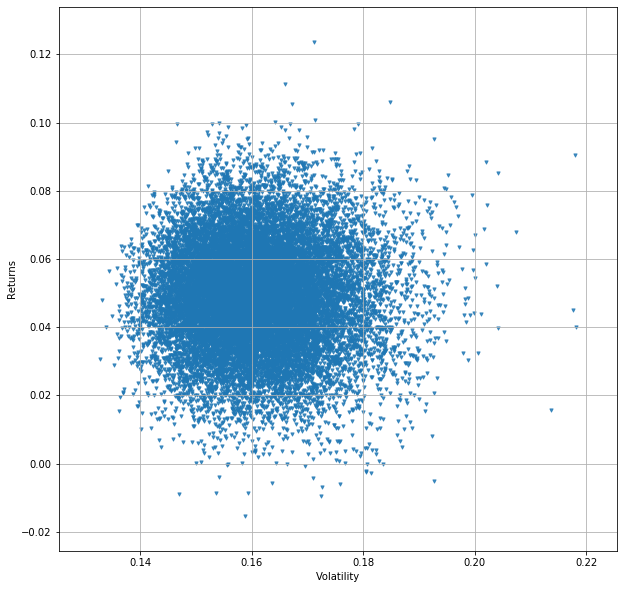

In [297]:
# Ploting efficient frontier

new_portfolios.plot.scatter(x='Volatility', y='Returns', marker='v', s=10, alpha=0.8, grid=True, figsize=[10,10])

In [298]:
#Calculating the minimum volatility point

minmun_volatility_point = new_portfolios.iloc[new_portfolios['Volatility'].idxmin()]                               
minmun_volatility_point

Returns            0.030753
Volatility         0.132787
JKH New_weight     0.056316
CTC New_weight     0.138853
HNB New_weight     0.062682
DIAL New_weight    0.019315
COMB New_weight    0.156316
SPEN New_weight    0.146764
NEST New_weight    0.128144
SLTL New_weight    0.049522
WATA New_weight    0.020148
DOCK New_weight    0.072243
EXPO New_weight    0.033131
HHL New_weight     0.054951
TKYO New_weight    0.018379
LION New_weight    0.024093
LHCL New_weight    0.019143
Name: 17396, dtype: float64

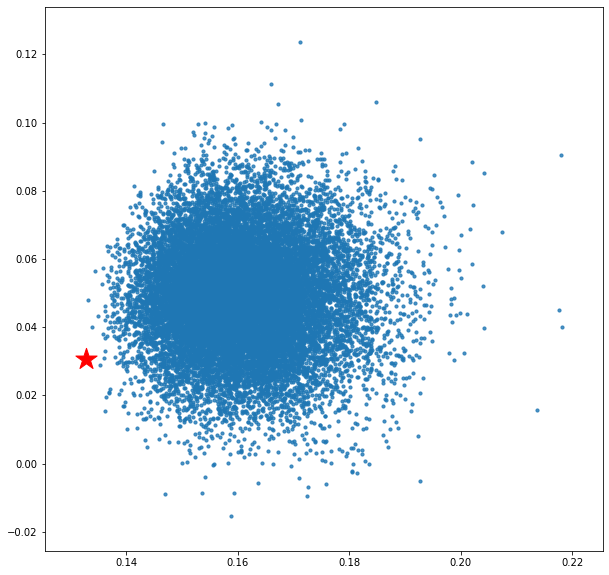

In [299]:
# plotting the minimum volatility point

plt.subplots(figsize=[10,10])
plt.scatter(new_portfolios['Volatility'], new_portfolios['Returns'], marker='o', s=10, alpha=0.8)
plt.scatter(minmun_volatility_point[1], minmun_volatility_point[0], color='r', marker='*', s=500)

In [300]:
#Calculating Maximum Return Point

maximum_returns_point = new_portfolios.iloc[new_portfolios['Returns'].idxmax()]                               
maximum_returns_point

Returns            0.123667
Volatility         0.171120
JKH New_weight     0.010518
CTC New_weight     0.152188
HNB New_weight     0.034945
DIAL New_weight    0.043272
COMB New_weight    0.007628
SPEN New_weight    0.052247
NEST New_weight    0.050426
SLTL New_weight    0.021212
WATA New_weight    0.106967
DOCK New_weight    0.033593
EXPO New_weight    0.001324
HHL New_weight     0.168384
TKYO New_weight    0.164211
LION New_weight    0.149036
LHCL New_weight    0.004049
Name: 10923, dtype: float64

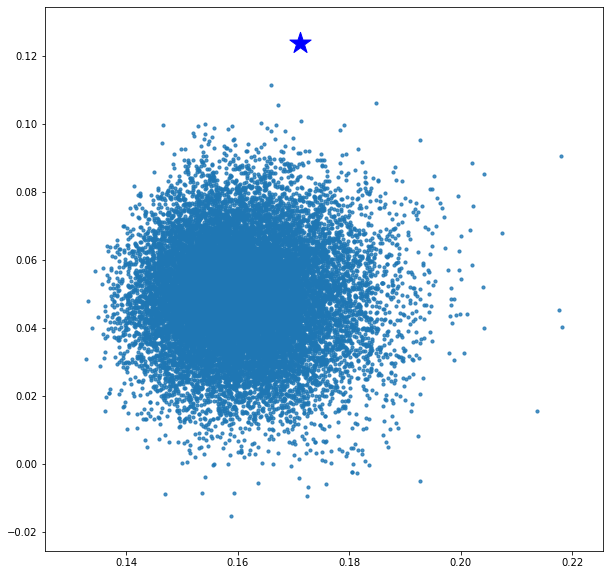

In [301]:
#plotting the Maximum Returns Point

plt.subplots(figsize=[10,10])
plt.scatter(new_portfolios['Volatility'], new_portfolios['Returns'], marker='o', s=10, alpha=0.8)
plt.scatter(maximum_returns_point[1], maximum_returns_point[0], color='b', marker='*', s=500)

In [302]:
#Identification of the Optimal Risk Portfolio

risk_factor = 0.05 #Risk Free Rate
optimal_risk_portfolio = new_portfolios.iloc[((new_portfolios['Returns']-risk_factor)/new_portfolios['Volatility']).idxmax()]
optimal_risk_portfolio

Returns            0.123667
Volatility         0.171120
JKH New_weight     0.010518
CTC New_weight     0.152188
HNB New_weight     0.034945
DIAL New_weight    0.043272
COMB New_weight    0.007628
SPEN New_weight    0.052247
NEST New_weight    0.050426
SLTL New_weight    0.021212
WATA New_weight    0.106967
DOCK New_weight    0.033593
EXPO New_weight    0.001324
HHL New_weight     0.168384
TKYO New_weight    0.164211
LION New_weight    0.149036
LHCL New_weight    0.004049
Name: 10923, dtype: float64

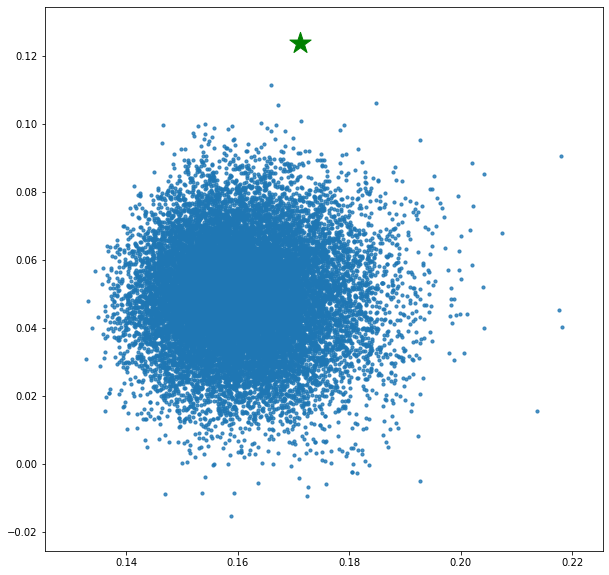

In [303]:
# plotting the Optimal risk portfolio point

plt.subplots(figsize=(10, 10))
plt.scatter(new_portfolios['Volatility'], new_portfolios['Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(optimal_risk_portfolio[1], optimal_risk_portfolio[0], color='g', marker='*', s=500)

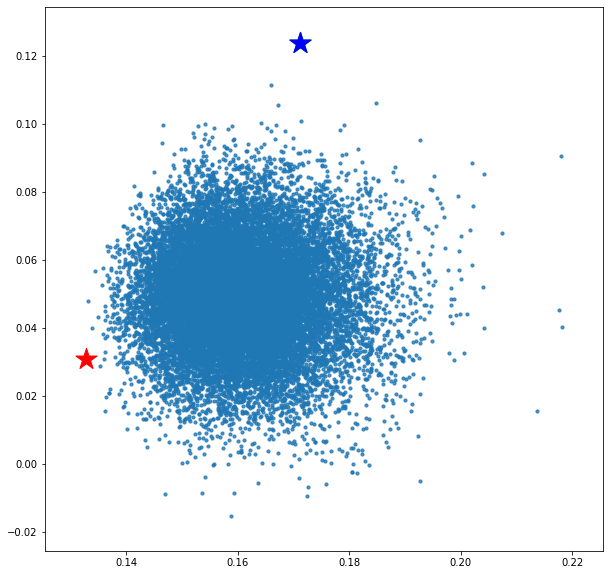

In [304]:
#Ploting Minimum Volatility Point, Maximum Returns Point and Optimal Risk Portfolio Point

plt.subplots(figsize=(10, 10))
plt.scatter(new_portfolios['Volatility'], new_portfolios['Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(minmun_volatility_point[1], minmun_volatility_point[0], color='r', marker='*', s=500)
plt.scatter(optimal_risk_portfolio[1], optimal_risk_portfolio[0], color='g', marker='*', s=500)
plt.scatter(maximum_returns_point[1], maximum_returns_point[0], color='b', marker='*', s=500)

In [305]:
def mkt_weights(reindex_data):
    cap_sum = reindex_data['Market Capitalization'].sum()

    return (reindex_data['Market Capitalization'])/cap_sum

In [306]:
def in_return_cov(df): 
    price = df.copy()
    price = (price / price.shift(1)) -1
    price.iloc[0,:] = 0 # Primeira linha = 0     
    
    returns = np.matrix(price)
    mean_returns = np.mean(returns, axis = 0)
    
    annual_returns = np.array([])
    for i in range(len(np.transpose(mean_returns))):
        annual_returns = np.append(annual_returns,(mean_returns[0,i]+1)**252-1)   
    
    
    return (annual_returns)

In [307]:
def cov_mat(df):
    price = df.copy()
    price = (price / price.shift(1)) -1
    price.iloc[0,:] = 0 # Primeira linha = 0   

    cov = price.cov()*252

    return np.matrix(cov)

In [308]:
def mkt_weights(reindex_data):
    cap_sum = reindex_data['Market Capitalization'].sum()

    return (reindex_data['Market Capitalization'])/cap_sum

In [309]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [310]:
#Import market data for All Share Price Index

cse_all_share = investpy.get_index_historical_data(index = 'CSE All-Share', country='Sri Lanka',
                                        from_date='01/01/2018',
                                        to_date='31/12/2019')
aspi = cse_all_share['Open']
aspi

Date
2018-01-02    6368.05
2018-01-03    6420.72
2018-01-04    6465.37
2018-01-05    6462.85
2018-01-08    6513.55
               ...   
2019-12-24    6031.74
2019-12-26    6054.78
2019-12-27    6088.75
2019-12-30    6130.10
2019-12-31    6165.71
Name: Open, Length: 481, dtype: float64

In [311]:
#Clalculating the walking average of All Share Price Index 

chg_aspi = aspi.pct_change().apply(lambda x: np.log(1+x))

n = 90
days_aspi = pd.Series(chg_aspi).rolling(window=n).mean().iloc[n-1:].values
yearly_er_aspi = aspi.resample('Y').last().pct_change().mean()

variance_aspi = statistics.variance(aspi) ** 0.5
yearly_er_aspi, variance_aspi 

(0.025879467635690823, 349.63529419975345)

In [312]:
#Importing data for calculating the market capitalization

df_weights = pd.read_csv(r'market-capitalization.csv')
stock_tickers = ['JKH.N0000', 'CTC.N0000', 'HNB.N0000', 'DIAL.N0000', 'COMB.N0000', 
                 'SPEN.N0000', 'NEST.N0000', 'SLTL.N0000', 'WATA.N0000', 'DOCK.N0000',
                 'EXPO.N0000', 'HHL.N0000', 'TKYO.N0000', 'LION.N0000', 'LHCL.N0000']

stock_weights = df_weights[df_weights.Symbol.isin(stock_tickers)]
stock_weights

,Company Name,Symbol,Price (Rs.),Issued Quantity,Market Capitalization,Market Cap. (as a % of Total Market Cap.)
13,AITKEN SPENCE PLC,SPEN.N0000,60.00,4.059960e+08,2.435976e+10,0.74
69,CEYLON TOBACCO COMPANY PLC,CTC.N0000,1066.75,1.873238e+08,1.998280e+11,6.03
79,COLOMBO DOCKYARD PLC,DOCK.N0000,79.80,7.185892e+07,5.734342e+09,0.17
83,COMMERCIAL BANK OF CEYLON PLC,COMB.N0000,89.00,1.098969e+09,9.780822e+10,2.95
91,DIALOG AXIATA PLC,DIAL.N0000,12.90,8.173809e+09,1.054420e+11,3.18
105,EXPOLANKA HOLDINGS PLC,EXPO.N0000,44.30,1.954915e+09,8.660273e+10,2.61
113,HATTON NATIONAL BANK PLC,HNB.N0000,135.75,4.103196e+08,5.570089e+10,1.68
120,HEMAS HOLDINGS PLC,HHL.N0000,85.00,5.964203e+08,5.069572e+10,1.53
136,JOHN KEELLS HOLDINGS PLC,JKH.N0000,156.00,1.319532e+09,2.058470e+11,6.21
168,LION BREWERY CEYLON PLC,LION.N0000,570.00,8.000000e+07,4.560000e+10,1.38


In [313]:
reindex_data = stock_weights.reindex([136, 69, 113, 91, 83, 13, 198, 261, 298, 79, 105, 120, 283, 168, 279])
reindex_data
reindex_data.drop('Market Cap. (as a % of Total Market Cap.)', axis=1)

,Company Name,Symbol,Price (Rs.),Issued Quantity,Market Capitalization
136,JOHN KEELLS HOLDINGS PLC,JKH.N0000,156.00,1.319532e+09,2.058470e+11
69,CEYLON TOBACCO COMPANY PLC,CTC.N0000,1066.75,1.873238e+08,1.998280e+11
113,HATTON NATIONAL BANK PLC,HNB.N0000,135.75,4.103196e+08,5.570089e+10
91,DIALOG AXIATA PLC,DIAL.N0000,12.90,8.173809e+09,1.054420e+11
83,COMMERCIAL BANK OF CEYLON PLC,COMB.N0000,89.00,1.098969e+09,9.780822e+10
13,AITKEN SPENCE PLC,SPEN.N0000,60.00,4.059960e+08,2.435976e+10
198,NESTLE LANKA PLC,NEST.N0000,1187.75,5.372546e+07,6.381242e+10
261,SRI LANKA TELECOM PLC,SLTL.N0000,35.10,1.804860e+09,6.335059e+10
298,WATAWALA PLANTATIONS PLC,WATA.N0000,56.10,2.033086e+08,1.140561e+10
79,COLOMBO DOCKYARD PLC,DOCK.N0000,79.80,7.185892e+07,5.734342e+09


In [314]:
W = mkt_weights(reindex_data)
W

136    0.196829
69     0.191074
113    0.053261
91     0.100823
83     0.093523
13     0.023293
198    0.061017
261    0.060575
298    0.010906
79     0.005483
105    0.082809
120    0.048475
283    0.018684
168    0.043602
279    0.009648
Name: Market Capitalization, dtype: float64

In [315]:
# Calculate percentage change in stock prices using log for represent data as time additive values.  

returns = df.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2011-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-16,-0.010041,0.000000,-0.018026,-0.010363,-0.004235,-0.006826,0.001419,-0.010949,-0.004175,0.007896,-0.079464,0.000000,-0.008498,-0.009373,-0.024098
2011-06-17,0.000634,-0.019100,0.000000,-0.021053,0.019368,-0.006873,0.000000,-0.001837,0.004175,-0.005533,-0.062035,-0.002186,-0.026325,-0.013544,0.000000
2011-06-20,-0.000634,0.005495,-0.004546,0.157186,-0.038441,-0.017392,0.000000,0.114510,0.000000,0.005533,0.031499,0.008715,-0.001754,0.022028,0.000000
2011-06-21,0.000000,-0.002743,-0.004614,-0.146603,0.019405,0.003503,-0.000284,-0.121890,0.004158,0.000000,-0.031499,-0.013101,0.028079,-0.032997,-0.022196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.010375,0.037209,-0.005187,0.007905,0.000000,-0.008547,0.000616,0.022765,-0.045635,0.023610,-0.019803,-0.012579,0.000000,-0.008217,0.002407
2019-12-26,-0.001215,-0.044365,0.022843,-0.015873,-0.010340,0.010672,-0.000616,-0.012945,-0.003899,0.016529,0.000000,0.012579,0.062003,0.006579,0.002401
2019-12-27,0.006061,0.022473,-0.011386,0.000000,0.005183,0.000000,0.000000,-0.003263,0.019343,0.030672,-0.020203,0.006231,0.002002,0.000328,-0.014493


In [316]:
#Calculate Daily Risk Free Rate

rf = ((1 + 0.15796) ** (1/365)) - 1
rf

0.0004018885060754762

In [317]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [318]:
cov_matrix = np.asmatrix(cov_matrix)

In [319]:
#Risk Aversion coefficient genereted through pyportfolioopt
delta = 0.002064

#Calculating Prior Distribution
prior_distribution = delta * cov_matrix @ W

prior = pd.DataFrame(prior_distribution, index=symbols)
prior

,0
JKH,1.848385e-07
CTC,1.850550e-07
HNB,1.496490e-07
DIAL,2.083800e-07
COMB,1.271184e-07
SPEN,9.237852e-08
NEST,7.486520e-08
SLTL,2.247904e-07
WATA,1.387922e-07
DOCK,9.505579e-08


In [320]:
#Setting up view vector and pick matrix

Q = np.array([-0.00204, -0.00062, -0.014, 0.07, -0.004, 0.04, 0.005, 0.02, 0.9, 0.06, 0.24, 0.038, 0.06, -0.001, 0.029]).reshape(-1, 1)
P = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    ]
)

In [321]:
#Calculate the omega value

tau = 0.025
omega = P.dot(tau * cov_matrix).dot(P.T)
omega_inv = np.linalg.inv(omega)

In [322]:
tau_cov = tau * cov_matrix
tau_cov_inv = (np.linalg.inv(tau_cov))

In [388]:
omega_diag = np.diag(np.diag(omega_inv))

In [389]:
view_omega = (P.T).dot(omega_diag).dot(P)
part_one = tau_cov_inv + view_omega
part_one_inv = np.linalg.inv(part_one)

In [400]:
A = tau_cov_inv.dot(prior)
B = (P.T).dot(omega_diag).dot(Q)

part_two = A + B

In [401]:
expected_returns = part_one_inv.dot(part_two)
expected_returns = pd.DataFrame(expected_returns, columns = ['Expected Return'] , index=symbols)
expected_return

JKH     0.009535
CTC     0.146913
HNB     0.028607
DIAL    0.083530
COMB    0.013521
SPEN   -0.106744
NEST    0.088142
SLTL   -0.022792
WATA    0.134145
DOCK   -0.119461
EXPO   -0.054185
HHL     0.179439
TKYO    0.177179
LION    0.191762
LHCL   -0.011385
dtype: float64

In [402]:
portfolio_return = np.sum(expected_returns)
portfolio_return

Expected Return    1.034376
dtype: float64

In [403]:
p_omega_inv = (P.T).dot(omega_diag)

In [404]:
#Calculating posterior covariance matrix

H = tau * cov_matrix
H_inv = np.linalg.inv(H)

I = p_omega_inv .dot(P)

O = H + I
M = np.linalg.inv(O)
#pd.DataFrame(M)

In [405]:
#New Covariance Matrix

post_cov = cov_matrix + M
#pd.DataFrame(post_cov)

In [406]:
#Black Litterman weight calculation

part_one = delta * post_cov
part_one = np.linalg.inv(part_one)
#pd.DataFrame(part_one)

In [407]:
#Black Litterman weight calculation

part_three = delta * post_cov
part_three = np.linalg.inv(part_three)
#pd.DataFrame(part_three)

In [408]:
#Weigts

post_weights = part_three.dot(prior)
post_weights

matrix([[0.19350939],
        [0.18693763],
        [0.05341531],
        [0.09929346],
        [0.09389362],
        [0.0235263 ],
        [0.06016142],
        [0.05997386],
        [0.01128833],
        [0.00606597],
        [0.08152874],
        [0.04808073],
        [0.01897794],
        [0.04268007],
        [0.010167  ]])

In [409]:
sum_weights = np.sum(post_weights)
sum_weights

0.9894997914777479